<H1> 3.Plotting for Exploratory data analysis (EDA)
    <H3>(3.1) Basic Terminology

<p>-> What is EDA?<br>
-> Data-point/vector/Oberservation<br>
-> Data-set<br>
-> Feature/Variable/Input-variable/Independent-variable<br>
-> Label/dependent-variable/Output-variable/Class/Class-label/Response<br>
-> Vector: 2-D, 3-D...........n-D<br> </p>


<H2> Iris Flower dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv("iris.csv")

In [4]:
#How many data points and features
print(iris.shape)

(150, 5)


In [5]:
# What are the column names in out dataset?
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [7]:
# How many data points for each class are present?
#(or) How many flowers for each species are present?

iris["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

<h2> (3.2) 2-D Scatter Plot

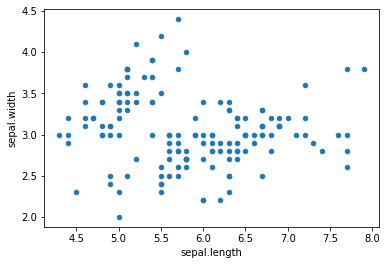

In [10]:
#2-D scatter plot:
# Always understand the axis: labels and scale.

iris.plot(kind = 'scatter', x ='sepal.length', y = 'sepal.width')
plt.show()

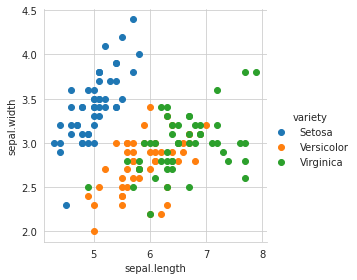

In [17]:
# 2-D scatter plot with color-coding for each flower type/class
# here sns corresponds to seaborn
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'variety', height = 4) \
.map(plt.scatter, 'sepal.length', 'sepal.width') \
.add_legend();

plt.show()

**Observation(s):**

1. Using speal_length and sepal_width features, we can distinguish Setosa floweres from others.
2. Separating Versicolor from Virginica is much harder as they have considerable overlap

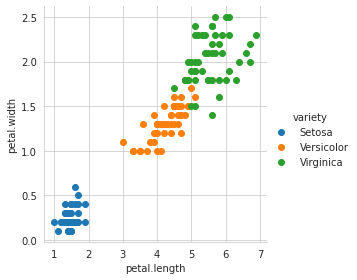

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'variety', height = 4) \
.map(plt.scatter, 'petal.length', 'petal.width') \
.add_legend();

plt.show()

**Pair PLot**

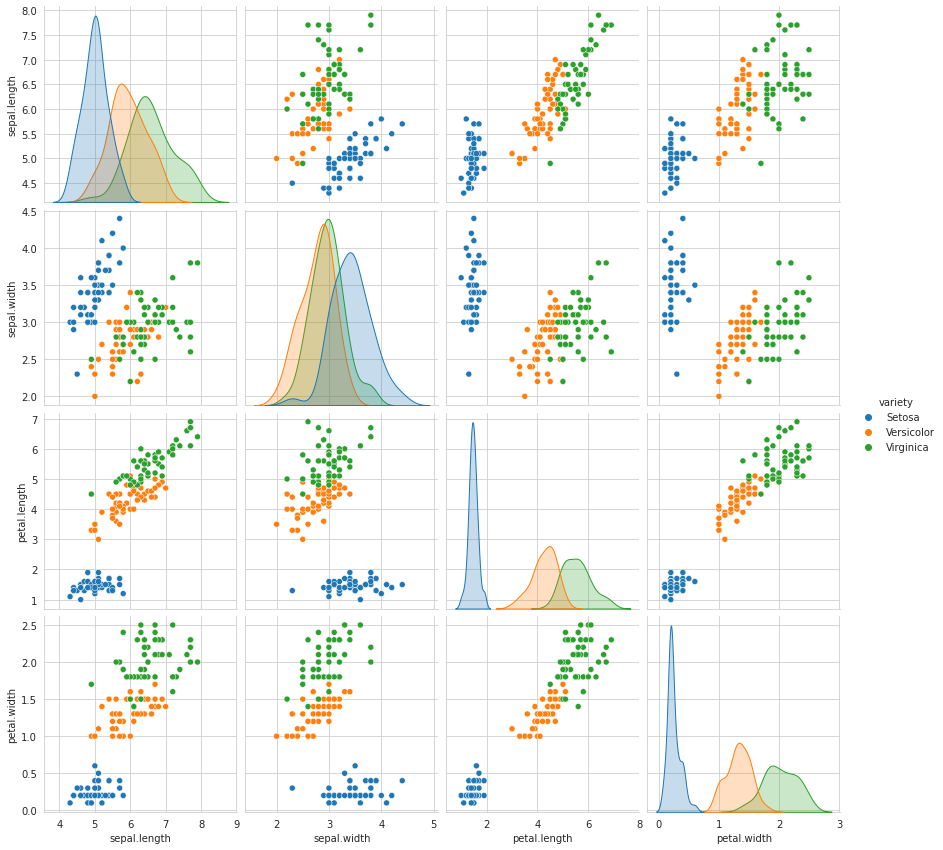

In [23]:
# pairwise scatter plot: pair-plot
# Disadvantage:
    #can be used when number of features are high.
    #Cannot visualize higher dimensional patterns in 3-D and 4-D.
    # Only possible to view 2D patters,
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris, hue = 'variety', height = 3);
plt.show()
    

**Obeservatios:**
1. petal.length and petal.width are the most useful features to identify various flower types.
2. While Setosa can be easily identified(linearly separable), Virginica and Versicolor have some overlap (almost linearly separable).
3. We can find "lines" and "if else" conditions to build simple model to classify the flower types.

**Limitation to Pairplot:**
When the number of features keeps on increasing it becomes difficult to use pairplot as the number of plots increases 10c2.

# (3.4) Histogram, PDF, CDF

In [24]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


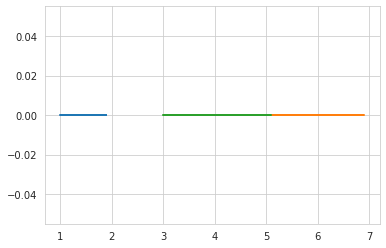

In [41]:
import numpy as np
iris_setosa = iris.loc[iris['variety'] == 'Setosa'];
iris_virginica = iris.loc[iris['variety'] == 'Virginica'];
iris_versicolor = iris.loc[iris['variety'] == 'Versicolor'];

#print(iris_setosa["petal.length"])
plt.plot(iris_setosa['petal.length'], np.zeros_like(iris_setosa['petal.length']))
#above x axis is petal.length and y axis is all zeros
plt.plot(iris_virginica['petal.length'], np.zeros_like(iris_virginica['petal.length']))
plt.plot(iris_versicolor['petal.length'], np.zeros_like(iris_versicolor['petal.length']))

plt.show()
# Disadvantages of 1-D scatter  plot: Very hard to make sense as points
# are overlapping a lot.
# Are there better ways of visualizing 1-D scatter plots?

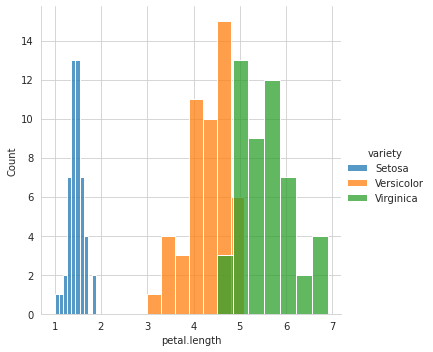

In [42]:
sns.FacetGrid(iris, hue = 'variety', height = 5) \
.map(sns.histplot, 'petal.length').add_legend()
plt.show()

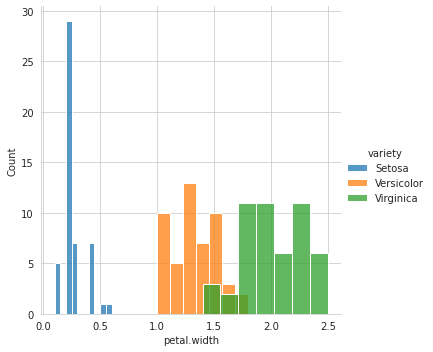

In [47]:
sns.FacetGrid(iris, hue = 'variety', height = 5) \
.map(sns.histplot, 'petal.width').add_legend()
plt.show()

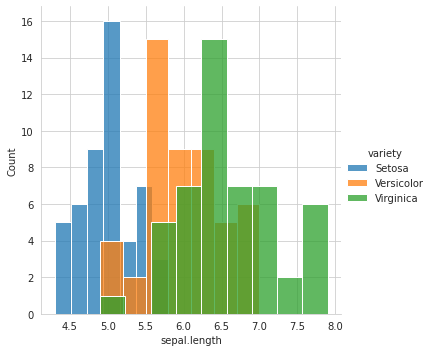

In [48]:
sns.FacetGrid(iris, hue = 'variety', height = 5) \
.map(sns.histplot, 'sepal.length').add_legend()
plt.show()

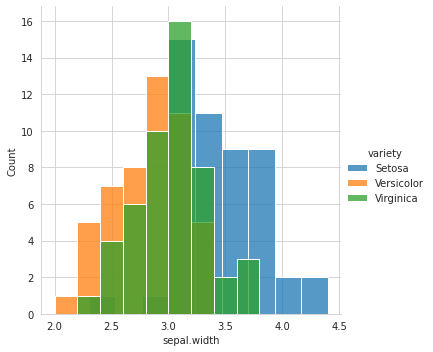

In [49]:
sns.FacetGrid(iris, hue = 'variety', height = 5) \
.map(sns.histplot, 'sepal.width').add_legend()
plt.show()

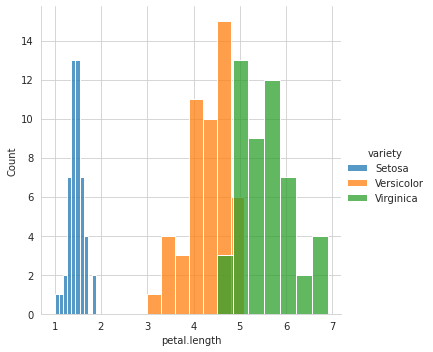

In [57]:
sns.FacetGrid(iris, hue = 'variety', height = 5) \
.map(sns.histplot, 'petal.length').add_legend()
plt.show()

[0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]


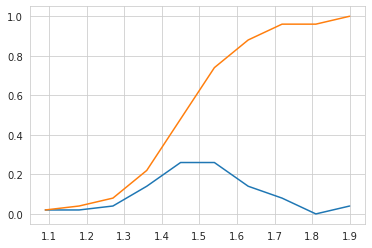

In [63]:
# Need for Cummulative distribution function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal.lenght of less than 1.6?
# How to construct CDF?
# How to read a CDF?

# Plot CDF of petal.length

counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins =10,
                                density = True)
pdf = counts/(sum(counts))
print(counts)
print(bin_edges)
print(pdf)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

Above if you see there are approx 83% of setosa flowers that have petal.length <= 1.6 and 100% of setosa flowers have petal.length <= 1.9